In [2]:
from IPython.display import clear_output
! cd .. && pip install -e .
clear_output()

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [6]:
! wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

curl: Remote file name has no length!
curl: (23) Failed writing received data to disk/application


## Visualization utilities

In [4]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.


## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

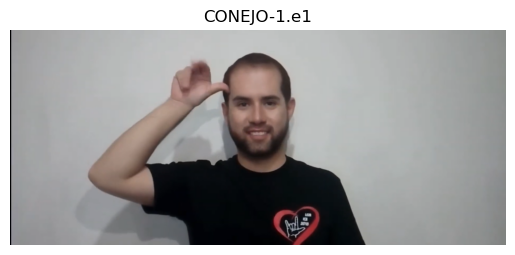

In [11]:
import cv2
import glob
from matplotlib import pyplot as plt
import os

def cv2_imshow(img):
    plt.imshow(img)
    plt.title(os.path.basename(images[0]).replace(".png", ""))
    plt.axis(False)
    plt.show()

images = glob.glob('datasets/dictionary/CONEJO*')
img = cv2.imread(images[2])
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


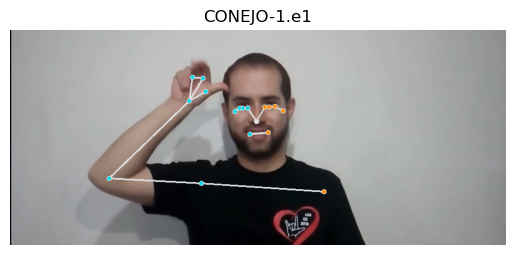

In [13]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
model_asset = "pose_landmarker_heavy.task"
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image


# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path=model_asset)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(images[2])

# STEP 4: Detect pose landmarks from the input image.
pose_landmarker_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR), pose_landmarker_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [28]:
import numpy as np
np.array(pose_landmarker_result.pose_landmarks[0])[[16,18,20,22]], np.array(hand_landmarker_result.hand_landmarks[0])

(array([NormalizedLandmark(x=0.2114938199520111, y=0.48576977849006653, z=-1.497778058052063, visibility=0.9885665774345398, presence=0.9998835325241089),
        NormalizedLandmark(x=0.2175934910774231, y=0.43865150213241577, z=-1.6545158624649048, visibility=0.9899188280105591, presence=0.9998643398284912),
        NormalizedLandmark(x=0.24692367017269135, y=0.4291691780090332, z=-1.5860934257507324, visibility=0.9893062710762024, presence=0.9999229907989502),
        NormalizedLandmark(x=0.25657713413238525, y=0.4484127163887024, z=-1.4926578998565674, visibility=0.9890475869178772, presence=0.999958872795105)],
       dtype=object),
 array([NormalizedLandmark(x=0.21511933207511902, y=0.479763388633728, z=1.2544877847631142e-07, visibility=0.0, presence=0.0),
        NormalizedLandmark(x=0.24916161596775055, y=0.47530966997146606, z=-0.013360373675823212, visibility=0.0, presence=0.0),
        NormalizedLandmark(x=0.2776210308074951, y=0.4574984312057495, z=-0.017089828848838806, vi

In [87]:
hand_landmarker = detection_result
hand_landmarker.hand_world_landmarks

[[Landmark(x=-0.03594236075878143, y=0.0871540829539299, z=0.006360535975545645, visibility=0.0, presence=0.0),
  Landmark(x=-4.500150680541992e-05, y=0.07503239065408707, z=-0.0064836787059903145, visibility=0.0, presence=0.0),
  Landmark(x=0.02378232404589653, y=0.05819506198167801, z=-0.01574692130088806, visibility=0.0, presence=0.0),
  Landmark(x=0.02705453895032406, y=0.029460124671459198, z=-0.030594676733016968, visibility=0.0, presence=0.0),
  Landmark(x=-0.002541877795010805, y=0.01098199188709259, z=-0.030405329540371895, visibility=0.0, presence=0.0),
  Landmark(x=0.026883840560913086, y=0.008219173178076744, z=0.003870034823194146, visibility=0.0, presence=0.0),
  Landmark(x=0.03409702330827713, y=-0.02175898663699627, z=-0.004151612054556608, visibility=0.0, presence=0.0),
  Landmark(x=0.039068449288606644, y=-0.02883363887667656, z=-0.019198250025510788, visibility=0.0, presence=0.0),
  Landmark(x=0.03464483842253685, y=-0.010754554532468319, z=-0.03962470591068268, visi

Visualize the pose segmentation mask.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


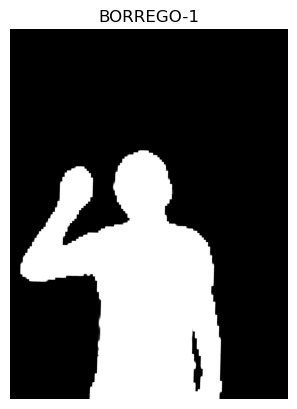

In [26]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

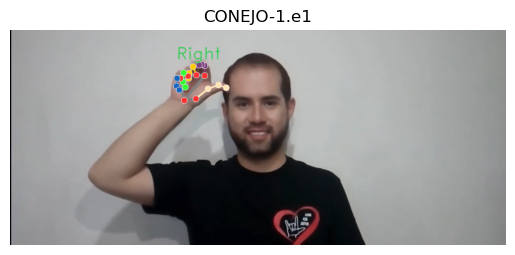

In [14]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image


import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)

detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(images[2])

# STEP 4: Detect hand landmarks from the input image.
hand_landmarker_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR), hand_landmarker_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [16]:
left,right = (
                       0 if len(handedness) >= 1 and len(handedness[0]) >= 1 and handedness[0][0].category_name == 'Left' else 1 if len(handedness) >= 2 and len(handedness[1]) >= 1 and handedness[1][0].category_name == 'Left'  else None,
                       0 if len(handedness) >= 1 and len(handedness[0]) >= 1 and handedness[0][0].category_name == 'Right' else 1 if len(handedness) >= 2 and len(handedness[1]) >= 1 and handedness[1][0].category_name == 'Right'  else None
                     )
left,right

(1, 0)

1

In [17]:
hand_landmarker_result.hand_world_landmarks[left]

[Landmark(x=-0.01308194175362587, y=-0.010690237395465374, z=0.0656229704618454, visibility=0.0, presence=0.0),
 Landmark(x=-0.016970191150903702, y=-0.0033389474265277386, z=0.043983668088912964, visibility=0.0, presence=0.0),
 Landmark(x=-0.012171030975878239, y=0.011398074217140675, z=0.02741275541484356, visibility=0.0, presence=0.0),
 Landmark(x=-0.02223169058561325, y=0.025503672659397125, z=-0.002249019220471382, visibility=0.0, presence=0.0),
 Landmark(x=-0.029399089515209198, y=0.044381629675626755, z=-0.02010807953774929, visibility=0.0, presence=0.0),
 Landmark(x=0.00885007157921791, y=-0.00014219962758943439, z=-0.007911928929388523, visibility=0.0, presence=0.0),
 Landmark(x=0.0017796250758692622, y=-0.014223708771169186, z=-0.026660479605197906, visibility=0.0, presence=0.0),
 Landmark(x=0.0011075058719143271, y=-0.0060789394192397594, z=-0.031662579625844955, visibility=0.0, presence=0.0),
 Landmark(x=0.0033248113468289375, y=0.004907791968435049, z=-0.041455477476119995

In [8]:
0 if len(handedness) >= 1 and len(handedness[0]) >= 1 and handedness[0][0].category_name == 'Right' else 1 if len(handedness) >= 2 and len(handedness[1]) >= 1 and handedness[1][0].category_name == 'Right'  else None

0

In [ ]:
 for idx in range(0,21):
                landmarks[idx+15] = (hand_world_landmarks[left][idx].x,hand_world_landmarks[left][idx].y,hand_world_landmarks[left][idx].z)

In [11]:
from uuid_extensions import uuid7, uuid7str

In [50]:
np.array([[1,0],[1,0],[1,0],[1,0]]).shape

(4, 2)

In [1]:
from mexican_sign_language_toolkit.pose_landmarker import detect_landmarks_from_image
import glob
import numpy as np
images = glob.glob('datasets/dictionary/CANGURO-2.png')
x = detect_landmarks_from_image(images[0])
x

array([[-2.74558160e-02, -5.95034480e-01, -2.59700686e-01],
       [ 8.87505710e-04, -6.19367599e-01, -2.47284979e-01],
       [ 8.59064050e-04, -6.20033085e-01, -2.36455321e-01],
       [-8.12508166e-04, -6.20382428e-01, -2.39666820e-01],
       [-3.29206064e-02, -6.27203643e-01, -2.57654011e-01],
       [-3.05781513e-02, -6.28411055e-01, -2.74019629e-01],
       [-2.63908841e-02, -6.16320252e-01, -2.53321141e-01],
       [ 7.93170184e-02, -6.15555406e-01, -1.43636808e-01],
       [-8.94557908e-02, -5.73788941e-01, -1.32313192e-01],
       [ 1.72680542e-02, -5.84529459e-01, -2.13449538e-01],
       [-2.82273255e-02, -5.54770827e-01, -2.37675652e-01],
       [ 1.86465681e-01, -4.46396083e-01, -3.67176794e-02],
       [-1.39664382e-01, -5.08811295e-01, -4.45933593e-03],
       [ 2.71496743e-01, -2.83988595e-01, -1.64171025e-01],
       [-2.10238874e-01, -2.61867195e-01, -1.57001749e-01],
       [-1.30819418e-02, -1.06902374e-02,  6.56229705e-02],
       [-1.69701912e-02, -3.33894743e-03

In [ ]:
for i in range(len(pose_landmarks)):
    print([pose_landmarks[i].x,pose_landmarks[i].y,pose_landmarks[i].z])

In [13]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=True)

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356]]),
 array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 4]], dtype=int64))

In [9]:
import gradio as gr
import numpy as np

text = "0"
def flip(im):
    print(im)
    return text

demo = gr.Interface(
    flip, 
    gr.Image(source="webcam", streaming=True), 
    "text",
    live=True
)
demo.launch(share=True)
""

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://37f5b0a6b53e38b6c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


''

# Notes

Given a set S of points in a space M and a query point $q \in M$, find the closest point in S to q.

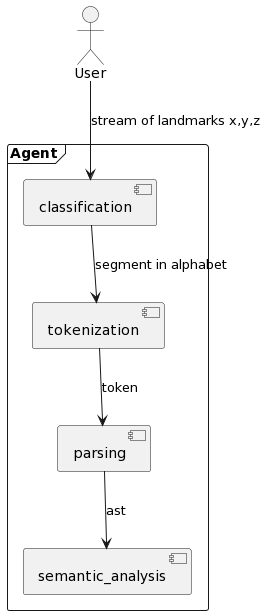

In [11]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('pyfunc', func=lambda A, B: 0)
X = [[1, 2], [3, 4], [5, 6]]
Y = [[7, 8], [9, 10]]
dist.pairwise(X,Y)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
dist.__class__

sklearn.metrics._dist_metrics.PyFuncDistance64

In [1]:
from mexican_sign_language_toolkit.neighbors import Bruteforce, standard_normalization, AutomaticNearestNeighbors, procrustes_distance

In [2]:
matrix = np.array([[1, 2], [3, 4]])
space = np.array([
    {'segment': '1', 'name': 'A', 'matrix': standard_normalization(matrix)}
])
x=AutomaticNearestNeighbors(space)

NameError: name 'np' is not defined

In [64]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
matrix = standard_normalization(np.array([[1,2,3],[4,5,6],[7,8,9]]))
nn=NearestNeighbors(metric=lambda A, B: procrustes_distance(np.reshape(A, (3, -1)), np.reshape(B, (3, -1))))

nn.fit(
    [
        np.reshape(np.array(matrix), -1),
        np.reshape(np.array(matrix), -1)
    ]
)

NearestNeighbors(metric=<function <lambda> at 0x7f6fd819ac10>)

In [36]:
distances, indices = nn.kneighbors([np.reshape(np.array(matrix), -1)], 2, True)
indices

array([[0, 1]])

In [53]:
space = np.array([{'name': 0},{'name': 1}])
space[np.reshape(indices, -1)][0]

{'name': 0}

In [5]:
matrix = standard_normalization(np.array([[1,2,3],[4,5,6],[7,8,9]]))
space=np.array([
    np.reshape(matrix, -1),
    np.reshape(matrix, -1)
])
X=space[0]
Y=space[1]

In [56]:
procrustes_distance(np.array([[5,5],[5,5]]), np.array([[5,5],[5,5]]))

980100.0

In [57]:
standard_normalization(np.array([[5, 5], [5,5]]))

/home/cest/Workspace/mexican_sign_language_toolkit/src/mexican_sign_language_toolkit/neighbors.py:9: RuntimeWarning: invalid value encountered in divide
  shape /= np.sqrt((shape ** 2).sum())


array([[nan, nan],
       [nan, nan]])

In [63]:
from scipy.spatial import procrustes
m = np.array([[5, 5], [5, 6]])
procrustes(m,m)

(array([[ 0.        , -0.70710678],
        [ 0.        ,  0.70710678]]),
 array([[ 0.        , -0.70710678],
        [ 0.        ,  0.70710678]]),
 2.465190328815662e-32)

In [139]:
from functools import lru_cache
import xxhash

class NumpyHasher:
        xxh64 = xxhash.xxh64()
        def __init__(self, value: np.array) -> None:
            self.value = value
            NumpyHasher.xxh64.update(value)
            self.hash = NumpyHasher.xxh64.intdigest()
            NumpyHasher.xxh64.reset()
    
        def __hash__(self) -> int:
            return self.hash
        
        def __eq__(self, __value: object) -> bool:
            return __value.hash == self.hash
        
def numpy_lru_cache(maxsize: int = 128):
    def wrapper_cache(func):
        # TODO: Implement a LFU version in C
        f=lru_cache(maxsize=maxsize)(lambda n1,n2: func(n1.value, n2.value))
        return lambda a1, a2: f(NumpyHasher(a1),NumpyHasher(a2)) 

    return wrapper_cache

@numpy_lru_cache()
def metric(a1,a2):
  return a2

metric(np.array([1,2]),np.array([1,2]))
metric(np.array([1,2]),np.array([1,2]))
metric(np.array([1,2]),np.array([1,2]))

array([1, 2])

In [111]:
np.fromstring('[[1, 2]]', sep=',')

/tmp/ipykernel_1346639/1218695164.py:1: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.fromstring('[[1, 2]]', sep=',')


array([], dtype=float64)